<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) 데이터를 전처리 하겠습니다.
- 데이터를 불러오세요.(read_csv 사용)
- id 칼럼은 drop하세요.
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인하세요.
- **중복된 샘플을 제거하고 남은 샘플의 수를 과제 제출폼에 제출하세요.**

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
df = df.drop('id', axis=1)

df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
df[df.duplicated() == True]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [4]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(70000, 12)
(69976, 12)


In [5]:
# 참고
# # 중복된 샘플 확인
# import numpy as np
# duple = df.duplicated()
# duple_index = np.where(duple==True)

# # 개수 및 인덱스no 확인
# print("중복된 샘플 :",len(duple_index[0]),"개" )
# print("중복된 샘플의 인덱스 no :", duple_index[0])

# # 중복값 제거 - 나중에 나오는 중복값을 제거
# df.drop_duplicates(keep="first", inplace=True)

# # 데이터 프레임 확인 -> 남은 샘플 개수 69,976개
# df

### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- 훈련과 테스트 데이터로 나누어 줍니다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련데이터를 훈련과 검증데이터로 나누어 줍니다(train_test_split 사용, train/validation = 80/20, random_state=2)
- **검증 데이터(X_val)의 갯수를 과제 제출폼에 제출하세요.**

In [6]:
target = 'cardio'
data_y = df[target]
data_X = df.drop(target, axis=1)

data_y.shape, data_X.shape

((69976,), (69976, 11))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, test_size=0.2, random_state=2)
print(X_train.shape)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=2)
print(X_train.shape)

len(X_val)

(55980, 11)
(44784, 11)


11196

### 3) 사이킷런의 LogisticRegression을 사용해 모델을 만들어 보세요.
- 모델을 만들기 전에 기준모델을 설정합니다.
- **LogisticRegression 모델을 학습하고(max_iter=1000) 검증세트 정확도를 과제 제출폼에 제출하세요.**


In [8]:
# 타겟 데이터 범주의 비율을 확인
y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

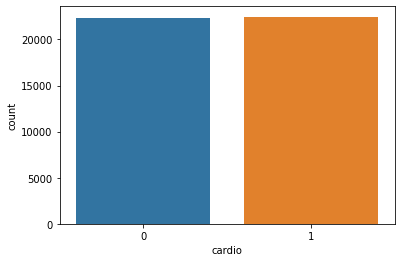

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [10]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

In [11]:
# 최다 클래스의 빈도 = 정확도 (기준 모델)
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.501697034655234


In [12]:
# LogisticRegression 모델을 학습
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print('검증세트 정확도', round(logistic.score(X_val, y_val), 3))

검증세트 정확도 0.707


### 4) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요.
- category_encoders를 사용해서 'gender' 특성만 원핫인코딩 하세요.
- LogisticRegression 모델을 다시 학습합니다.
- **검증세트 정확도를 과제 제출폼에 제출하세요.**

In [ ]:
# ! pip install category_encoders

In [15]:
# gender 내의 값을 텍스트로 변경(1 : FeMale, 2 : Male)
pd.set_option('mode.chained_assignment',  None)

X_train.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)
X_val.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)
X_test.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)

X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,FeMale,157,70.0,160,100,3,1,0,0,0
59211,19677,Male,174,80.0,150,80,1,1,0,0,1
26654,23504,FeMale,158,76.0,140,90,3,3,0,0,1
33421,18036,Male,173,128.0,160,110,3,1,0,1,0
12046,20225,Male,176,109.0,120,80,1,1,1,1,1


In [18]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names = True, cols=['gender'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
X_train = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

X_train.head()

,age,gender_FeMale,gender_Male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,1,0,157,70.0,160,100,3,1,0,0,0
59211,19677,0,1,174,80.0,150,80,1,1,0,0,1
26654,23504,1,0,158,76.0,140,90,3,3,0,0,1
33421,18036,0,1,173,128.0,160,110,3,1,0,1,0
12046,20225,0,1,176,109.0,120,80,1,1,1,1,1


In [20]:
logistic2 = LogisticRegression(max_iter=1000)
logistic2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print('검증세트 정확도', round(logistic2.score(X_val, y_val), 3))

검증세트 정확도 0.694


### 5) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요.
- **테스트 세트 정확도를 과제 제출폼에 제출하세요.(0.712 이상)**

In [22]:
# 특성값 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 표준화한 데이터로 모델 학습
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# 검증 데이터 결과 확인
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.723383351196856

In [25]:
# 테스트 데이터 결과 확인
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.7264218348099457

In [27]:
# 참고
X_train_encoded = X_train
X_val_encoded = X_val
X_test_encoded = X_test
# "최적화"라고 한다면 정확히 어떤 작업을 말하는 것일까? 다양하게 생각해보자.
# 1) 수업 내용엔 없었지만 하이퍼파라미터(C) 조정
# 객체 생성 & 모델 훈련
logistic_001 = LogisticRegression(C=0.01, max_iter=1000).fit(X_train_encoded, y_train)
logistic_01 = LogisticRegression(C=0.1, max_iter=1000).fit(X_train_encoded, y_train)
logistic = LogisticRegression(max_iter=1000).fit(X_train_encoded, y_train)
logistic_1 = LogisticRegression(C=1, max_iter=1000).fit(X_train_encoded, y_train)
logistic_10 = LogisticRegression(C=10, max_iter=1000).fit(X_train_encoded, y_train)


# 검증 데이터셋으로 정확도 측정
print('C=0.01 정확도', logistic_001.score(X_val_encoded, y_val))
print('C=0.1 정확도', logistic_01.score(X_val_encoded, y_val))
print('C=default 정확도', logistic.score(X_val_encoded, y_val))
print('C=1 정확도', logistic_1.score(X_val_encoded, y_val))
print('C=10 정확도', logistic_10.score(X_val_encoded, y_val))

C=0.01 정확도 0.6942658092175777
C=0.1 정확도 0.7094498035012504
C=default 정확도 0.6944444444444444
C=1 정확도 0.6944444444444444
C=10 정확도 0.7093604858878171


In [28]:
# 2) 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

# 객체 생성 & 모델 훈련
logistic_001_scaled = LogisticRegression(C=0.01, max_iter=1000).fit(X_train_scaled, y_train)
logistic_01_scaled = LogisticRegression(C=0.1, max_iter=1000).fit(X_train_scaled, y_train)
logistic_scaled = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)
logistic_1_scaled = LogisticRegression(C=1, max_iter=1000).fit(X_train_scaled, y_train)
logistic_10_scaled = LogisticRegression(C=10, max_iter=1000).fit(X_train_scaled, y_train)

# 검증 데이터셋으로 정확도 측정
print('C=0.01 정확도', logistic_001_scaled.score(X_val_scaled, y_val))
print('C=0.1 정확도', logistic_01_scaled.score(X_val_scaled, y_val))
print('C=default 정확도', logistic_scaled.score(X_val_scaled, y_val))
print('C=1 정확도', logistic_1_scaled.score(X_val_scaled, y_val))
print('C=10 정확도', logistic_10_scaled.score(X_val_scaled, y_val))

C=0.01 정확도 0.7057877813504824
C=0.1 정확도 0.721686316541622
C=default 정확도 0.723383351196856
C=1 정확도 0.723383351196856
C=10 정확도 0.7237406216505895


In [29]:
# 데이터 표준화 작업이 모델 최적화에 더욱 효과적인 것 같다.
# 테스트 데이터도 똑같이 표준화 후 모델 학습을 진행해 본다.

# test데이터 표준화
X_test_scaled = scaler.transform(X_test_encoded)

# test데이터를 가지고 예측 (1회) -> 정확도 UP
print('테스트 세트 정확도', logistic_scaled.score(X_test_scaled, y_test))

테스트 세트 정확도 0.7264218348099457


## 🔥 도전과제:

### 공지로 안내드리는 Github - Discussion 페이지에 올려보세요:)

### 6) EDA를 추가적으로 수행하고 아래 질문에 대한 본인만의 근거와 수행결과를 리포트해 보시고 서로 논해 보세요. 
- 새로운 특성을 만들 수 있다면, 어떤 특성공학을 해 볼 수 있을까요? 
- 아웃라이어가 있는 특성이 있다면, 어떤 기준으로 제거할 수 있을까요? 
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까요? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까요? 
- 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까요? 


In [30]:
# 데이터 확인
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [31]:
# 가공할 데이터프레임 별도로 생성
df2 = df.copy()

# 특성 공학
# 1. 나이(age)를 days가 아닌 years(나이값)로 변경
# 2. gender를 범주(Male / Female)로 변경 후 One-hot Encoding
# 3. 키(height)와 몸무게(weight)를 이용하여 체질량 지수(BMI) 특성 만들기

In [32]:
# 1. 나이(age)를 days가 아닌 years(나이값)로 변경
def daysToAge(days):
  return int(days/365)

df2.age = df2.age.apply(daysToAge)

df2.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
# 2. gender를 범주(Male / Female)로 변경 후 One-hot Encoding
df2.gender.replace({1: "FeMale", 2: "Male"}, inplace=True)

encoder = OneHotEncoder(use_cat_names = True, cols=['gender'])
df2 = encoder.fit_transform(df2)

df2.head()

,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,0,168,62.0,110,80,1,1,0,0,1,0
1,55,0,1,156,85.0,140,90,3,1,0,0,1,1
2,51,0,1,165,64.0,130,70,3,1,0,0,0,1
3,48,1,0,169,82.0,150,100,1,1,0,0,1,1
4,47,0,1,156,56.0,100,60,1,1,0,0,0,0


In [34]:
# 3. 키(height)와 몸무게(weight)를 이용하여 체질량 지수(BMI) 특성 만들기
df2['BMI'] = df2['weight'] / ((df2['height'])/100)**2

df2.head()

,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,1,0,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,0,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [35]:
# 이상치(Outlier) 확인 및 제거
print(df2.shape)
df2.describe()

(69976, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,0.349648,0.650352,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,27.557610
std,6.767103,0.476862,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.092210
min,29.000000,0.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.391837
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.000000,1.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


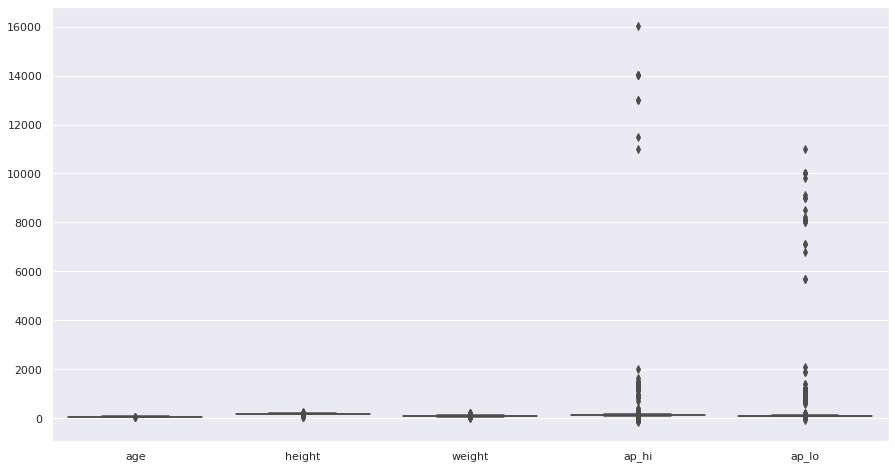

In [36]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df2[['age', 'height', 'weight', 'ap_hi',	'ap_lo']])

In [37]:
import numpy as np

df2 = df2[(df2['ap_hi'] >= np.percentile(df2['ap_hi'], 1)) & 
        (df2['ap_hi'] <= np.percentile(df2['ap_hi'], 99))] 

print(df2.shape)
df2.describe()

(69286, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.000000,69286.00000,69286.000000,69286.000000,69286.000000
mean,52.835277,0.349291,0.650709,164.364489,74.178680,126.757801,95.836172,1.365745,1.225803,0.087954,0.05346,0.804015,0.498441,27.542889
std,6.767182,0.476750,0.476750,8.192468,14.359115,16.278822,182.915855,0.679631,0.571740,0.283230,0.22495,0.396960,0.500001,6.054755
min,29.000000,0.000000,0.000000,55.000000,10.000000,90.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,23.875115
50%,53.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,26.370238
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.00000,1.000000,1.000000,30.120482
max,64.000000,1.000000,1.000000,250.000000,200.000000,180.000000,10000.000000,3.000000,3.000000,1.000000,1.00000,1.000000,1.000000,298.666667


In [38]:
df2 = df2[(df2['ap_lo'] >= np.percentile(df2['ap_lo'], 5)) & 
        (df2['ap_lo'] <= np.percentile(df2['ap_lo'], 95))] 

print(df2.shape)
df2.describe()

(64737, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000,64737.000000
mean,52.927584,0.352797,0.647203,164.462518,74.345696,127.075645,81.936296,1.366776,1.227104,0.087987,0.053200,0.803497,0.502139,27.572820
std,6.741393,0.477844,0.477844,8.144811,14.201848,15.045654,7.753612,0.681875,0.574191,0.283278,0.224434,0.397356,0.499999,5.993286
min,29.000000,0.000000,0.000000,55.000000,11.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.423570
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.229568
max,64.000000,1.000000,1.000000,250.000000,200.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [39]:
df2 = df2[(df2['height'] >= np.percentile(df2['height'], 1)) & 
        (df2['height'] <= np.percentile(df2['height'], 99))] 

print(df2.shape)
df2.describe()

(63579, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000,63579.000000
mean,52.925400,0.350776,0.649224,164.512292,74.282284,127.059202,81.931628,1.365813,1.227323,0.087529,0.052973,0.804023,0.501659,27.480094
std,6.738508,0.477217,0.477217,7.340470,14.024788,15.037310,7.744565,0.681103,0.574521,0.282611,0.223982,0.396954,0.500001,5.133052
min,29.000000,0.000000,0.000000,147.000000,11.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.402355
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,1.000000,1.000000,184.000000,200.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315


In [40]:
df2 = df2[(df2['weight'] >= np.percentile(df2['weight'], 1)) & 
        (df2['weight'] <= np.percentile(df2['weight'], 99))] 

print(df2.shape)
df2.describe()

(62381, 14)


,age,gender_Male,gender_FeMale,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000,62381.000000
mean,52.942322,0.352671,0.647329,164.559257,74.028656,127.029624,81.919847,1.363893,1.225517,0.087495,0.052965,0.803835,0.501467,27.384440
std,6.730745,0.477805,0.477805,7.290703,12.734190,14.953875,7.718315,0.680084,0.572808,0.282561,0.223965,0.397098,0.500002,4.735633
min,29.000000,0.000000,0.000000,147.000000,49.000000,90.000000,70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.094795
25%,48.000000,0.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,0.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.397977
75%,58.000000,1.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.103806
max,64.000000,1.000000,1.000000,184.000000,116.000000,180.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.904716


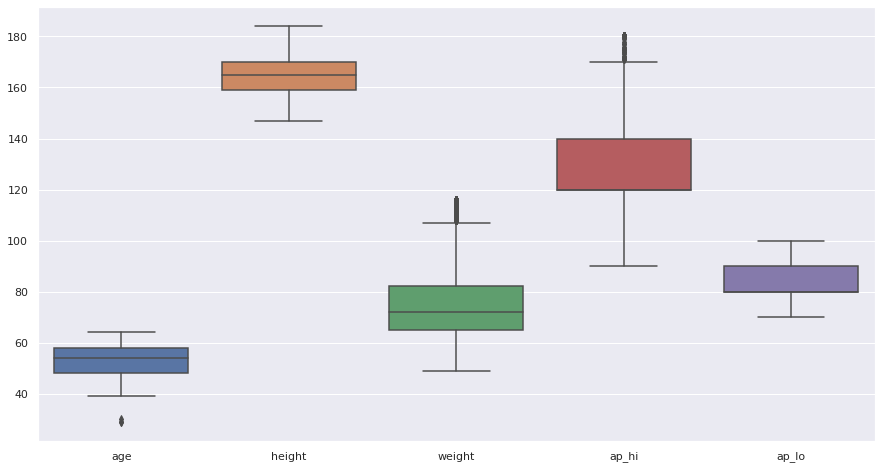

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(data=df2[['age', 'height', 'weight', 'ap_hi',	'ap_lo']])

In [42]:
# 데이터 나누기
target = 'cardio'
data_y = df2[target]
data_X = df2.drop(target, axis=1)

data_y.shape, data_X.shape

((62381,), (62381, 13))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, test_size=0.2, random_state=2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2, random_state=2)

In [44]:
# 타겟 데이터 범주의 비율을 확인
y_train.value_counts(normalize=True)

1    0.501916
0    0.498084
Name: cardio, dtype: float64

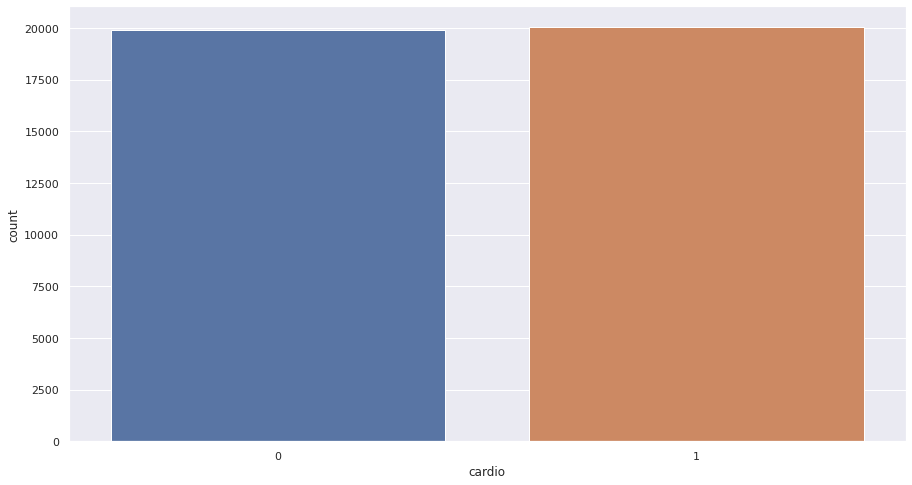

In [45]:
sns.countplot(x=y_train);

In [46]:
# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

In [47]:
print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.5019161886631767


In [48]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print('검증세트 정확도', round(logistic.score(X_val, y_val), 3))

검증세트 정확도 0.718


In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [51]:
# 표준화한 데이터로 모델 학습
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# 검증 데이터 결과 확인
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.7203687005310089

In [53]:
# 테스트 데이터 결과 확인
y_pred_test = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.717319868558147

In [54]:
# feature scaling 문서를 보면 여러가지 종류의 Scalar가 있는데, 각 Scalar는 각각 어떤 상황에 적용하면 좋을까요? 본 데이터에서는 어떤 scalar를 적용해볼 수 있을까요?
# 모델 성능을 높이기 위해 어떤 튜닝을 추가해 볼 수 있을까요?

# 위 두 질문에 대한 답 작성 필요

### 참고

In [55]:
# 새로운 특성 1 : 키와 몸무게를 가지고 BMI를 계산할 수 있다.
# BMI 계산 : 체중(kg)/신장(m)제곱

df["BMI"] = round(df["weight"]/pow(df["height"]*0.01, 2), 2)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01


In [56]:
# 새로운 특성 2 : age를 days -> years 로 바꾸어서 가독성을 높일 수 있다.
df["age_year"] = round(df["age"]/365, -1).astype("int")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50


In [57]:
# 새로운 특성 3 : 혈압 관련 컬럼을 활용해서 평균혈압을 구할 수 있다.
# 평균 혈압 계산법 : (수축기혈압 - 이완기혈압)*1/3 + 이완기혈압
ap_avg= (df["ap_hi"]-df["ap_lo"])*1/3 + df["ap_lo"]
df["ap_avg"] = round(ap_avg, 2)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33


In [58]:
# 원활한 반복문 구동을 위한 인덱스 재설정
df.reset_index(drop=True, inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.93,50,93.33
69972,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.47,60,106.67
69973,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.35,50,120.00
69974,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.10,60,98.33


In [59]:
# 새로운 특성 4 : 혈압 관련 컬럼을 활용해서 고/저혈압을 판단 할 수 있다.
# 고혈압 (high) : 수축기혈압 140이상 or 이완기혈압 90이상  
# 고혈압위험군 (high_risk) : 수축기혈압 120 이상 or 이완기혈압 80이상 
# 정상혈압(nomal) : 수축기혈압 120미만 and 이완기혈압 80미만
# 저혈압(low) : 수축기혈압 90이하 or 이완기혈압 60이하 

# 혈압 증상 기록을 위한 빈 컬럼 마련
df["ap_type"] = " "

# 수축기혈압(ap_hi)과 이완기혈압(ap_lo) 수치를 if문 조건으로 비교하여 구분

for index in range(len(df)):
  ap_hi = df["ap_hi"][index]
  ap_lo = df["ap_lo"][index]

  if ap_hi >= 140 or ap_lo>= 90:
    df["ap_type"][index] = "high"

  elif ap_hi <= 90 or ap_lo <= 60:
    df["ap_type"][index] = "low"

  elif ap_hi >= 120 or ap_lo >= 80:
    df["ap_type"][index] = "high_risk"

  elif ap_hi < 120 and ap_lo < 80:
    df["ap_type"][index] = "normal"

  else:
    df["ap_type"][index] = "ambi"

# 확인
df.head(20)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,age_year,ap_avg,ap_type
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.97,50,90.00,high_risk
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.93,60,106.67,high
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.51,50,90.00,high_risk
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.71,50,116.67,high
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.01,50,73.33,low
5,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.38,60,93.33,high_risk
6,22113,1,157,93.0,130,80,3,1,0,0,1,0,37.73,60,96.67,high_risk
7,22584,2,178,95.0,130,90,3,3,0,0,1,1,29.98,60,103.33,high
8,17668,1,158,71.0,110,70,1,1,0,0,1,0,28.44,50,83.33,normal
9,19834,1,164,68.0,110,60,1,1,0,0,0,0,25.28,50,76.67,low


In [60]:
df["ap_type"].value_counts()

high_risk    34970
high         24705
normal        7233
low           3068
Name: ap_type, dtype: int64

In [61]:
# 컬럼 재정렬
df_clean_1 = df[["age", "age_year", "gender", "height", "weight", "BMI", "ap_hi", "ap_lo", "ap_avg", "ap_type", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]]

In [62]:
# feature 탐색 1. 나이(age, age_year)
df_clean_1[["age", "age_year"]].describe()

,age,age_year
count,69976.000000,69976.000000
mean,19468.950126,52.996885
std,2467.374620,7.096762
min,10798.000000,30.000000
25%,17664.000000,50.000000
50%,19703.000000,50.000000
75%,21327.000000,60.000000
max,23713.000000,60.000000


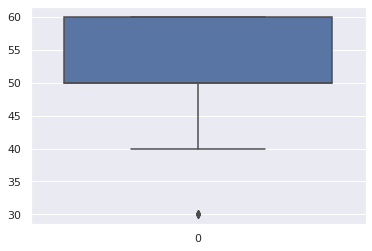

In [63]:
# 나이를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["age_year"])
plt.show()

In [64]:
# 나이 outlier제거
df_clean_1 = df_clean_1[df["age_year"]>40]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69972,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69973,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69974,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [65]:
# feature 탐색 2. BMI
df_clean_1[["height", "weight", "BMI"]].describe()

,height,weight,BMI
count,59706.000000,59706.000000,59706.000000
mean,164.177553,74.502269,27.727656
std,8.167535,14.321301,6.032943
min,55.000000,10.000000,3.470000
25%,159.000000,65.000000,23.920000
50%,164.000000,72.000000,26.570000
75%,169.000000,82.000000,30.470000
max,250.000000,200.000000,298.670000


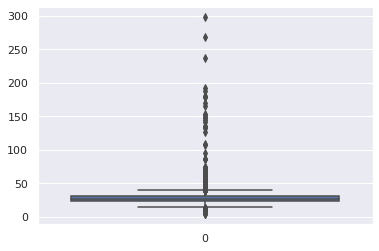

In [66]:
# BMI를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["BMI"])
plt.show()

In [67]:
# BMI의 이상치 : 데이터를 확인하여 이상치 제거 필요
df_clean_1[df_clean_1["BMI"]>=60]

# 신장 64cm? 65cm? 기입 오류로 보임.

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
224,21800,60,2,76,55.0,95.22,120,80,93.33,high_risk,1,1,0,0,1,0
389,16718,50,2,165,169.0,62.08,120,80,93.33,high_risk,1,1,0,0,1,0
2458,23646,60,2,159,165.0,65.27,130,70,90.00,high_risk,1,1,0,0,0,0
3313,17545,50,1,155,155.0,64.52,160,1000,720.00,high,1,1,0,0,1,1
6153,20990,60,1,122,161.0,108.17,120,80,93.33,high_risk,1,1,0,0,1,1
8171,17646,50,2,97,170.0,180.68,160,100,120.00,high,1,1,1,0,1,1
8677,19698,50,2,119,89.0,62.85,160,90,113.33,high,1,1,0,0,1,1
11229,18307,50,1,110,90.0,74.38,120,80,93.33,high_risk,1,1,0,0,1,0
12434,22077,60,1,137,161.0,85.78,150,100,116.67,high,2,1,0,0,0,1
12769,19594,50,1,75,168.0,298.67,120,80,93.33,high_risk,1,1,1,0,1,1


In [68]:
# 신장 값이 100 (= 1m) 이하는 모두 삭제
df_clean_1 = df_clean_1[df_clean_1["height"]>100]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [69]:
# feature 탐색 3.혈압 관련 feature 확인
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59683.000000,59683.000000,59683.000000
mean,129.942915,97.824808,108.529932
std,156.178407,192.053666,138.966296
min,-150.000000,-70.000000,-41.670000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.500000
max,16020.000000,11000.000000,7400.000000


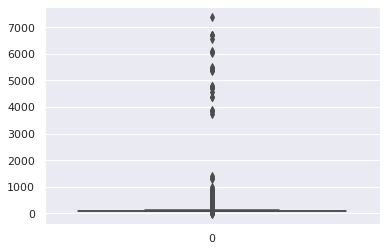

In [70]:
# 혈압이 마이너스값일 수 있을까?
# 수축기,이완기 혈압 컬럼의 최대값이 10,000 이상이 된다?
# 분명 잘못된 데이터이다.


# 평균 혈압 수치를 박스플롯으로 시각화하여 outlier 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 14]
%matplotlib inline

sns.boxplot(data=df_clean_1["ap_avg"])
plt.show()

In [71]:
# 혈압 데이터가 음수인 row - 수축기혈압 확인
df_clean_1[df_clean_1["ap_hi"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
16020,22108,60,2,161,90.0,34.72,-115,70,8.33,low,1,1,0,0,1,0
23986,18301,50,1,162,74.0,28.20,-140,90,13.33,high,1,1,0,0,1,1
35038,23325,60,2,168,59.0,20.90,-150,80,3.33,low,1,1,0,0,1,1
46618,23646,60,2,160,59.0,23.05,-120,80,13.33,low,1,1,0,0,0,0


In [72]:
# 혈압 데이터가 음수인 row 확인 - 이완기혈압 확인
df_clean_1[df_clean_1["ap_lo"]<=0]

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
2014,22712,60,2,167,59.0,21.16,906,0,302.00,high,1,1,0,0,1,0
16458,20457,60,1,156,50.0,20.55,138,0,46.00,low,3,1,0,0,1,1
17380,18226,50,1,164,78.0,29.00,138,0,46.00,low,1,1,0,0,1,0
22921,21182,60,2,166,68.0,24.68,149,0,49.67,high,1,1,0,0,1,1
25452,17952,50,2,176,73.0,23.57,12,0,4.00,low,1,1,0,0,1,0
27684,23396,60,2,180,73.0,22.53,140,0,46.67,high,1,1,1,1,1,1
38368,23208,60,2,170,81.0,28.03,148,0,49.33,high,1,1,0,0,1,0
40327,20322,60,1,162,50.0,19.05,309,0,103.00,high,1,1,0,0,1,0
41501,20970,60,1,154,41.0,17.29,806,0,268.67,high,1,1,0,0,1,0
42393,17988,50,2,176,69.0,22.28,906,0,302.00,high,1,1,0,0,1,0


In [73]:
# 음수값 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>0]
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>0]

df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,59662.000000,59662.000000,59662.000000
mean,129.912390,97.855050,108.539919
std,156.065683,192.079487,138.975158
min,1.000000,1.000000,12.000000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,104.670000
max,16020.000000,11000.000000,7400.000000


In [74]:
# 수축기 혈압이 이완기 혈압보다 낮을 수는 없다.
# 수축기 혈압이 이완기 혈압보다 낮은 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"] > df_clean_1["ap_lo"]]
df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [75]:
# 지나치게 높은/낮은 수축기혈압도 말이 안 됨. (몇 천, 몇 만)
# 수축기 혈압이 400 이상인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]<400]

# 수축기 혈압이 50 이하인 row 삭제
df_clean_1 = df_clean_1[df_clean_1["ap_hi"]>50]

df_clean_1.head(20)

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
5,21914,60,1,151,67.0,29.38,120,80,93.33,high_risk,2,2,0,0,0,0
6,22113,60,1,157,93.0,37.73,130,80,96.67,high_risk,3,1,0,0,1,0
7,22584,60,2,178,95.0,29.98,130,90,103.33,high,3,3,0,0,1,1
8,17668,50,1,158,71.0,28.44,110,70,83.33,normal,1,1,0,0,1,0
9,19834,50,1,164,68.0,25.28,110,60,76.67,low,1,1,0,0,0,0


In [76]:
# 지나치게 낮은 이완기 혈압도 말이 안 됨
# 조사에 따르면 이완기 혈압이 30미만인 경우는 전체 인구의 0.22%.
# 여기서는 20 이하인 row 삭제

df_clean_1 = df_clean_1[df_clean_1["ap_lo"]>20]
df_clean_1

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
69972,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
69973,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
69974,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [77]:
df_clean_1[["ap_hi", "ap_lo", "ap_avg"]].describe()

,ap_hi,ap_lo,ap_avg
count,58533.000000,58533.000000,58533.000000
mean,127.746485,81.799891,97.114492
std,16.749562,9.392894,11.004872
min,70.000000,30.000000,53.330000
25%,120.000000,80.000000,93.330000
50%,120.000000,80.000000,93.330000
75%,140.000000,90.000000,103.330000
max,240.000000,182.000000,186.670000


In [78]:
# 데이터 정제 후 인덱스 재정렬
df_clean = df_clean_1.reset_index(drop=True)
df_clean

,age,age_year,gender,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type,cholesterol,gluc,smoke,alco,active,cardio
0,18393,50,2,168,62.0,21.97,110,80,90.00,high_risk,1,1,0,0,1,0
1,20228,60,1,156,85.0,34.93,140,90,106.67,high,3,1,0,0,1,1
2,18857,50,1,165,64.0,23.51,130,70,90.00,high_risk,3,1,0,0,0,1
3,17623,50,2,169,82.0,28.71,150,100,116.67,high,1,1,0,0,1,1
4,17474,50,1,156,56.0,23.01,100,60,73.33,low,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58528,19240,50,2,168,76.0,26.93,120,80,93.33,high_risk,1,1,1,0,1,0
58529,22601,60,1,158,126.0,50.47,140,90,106.67,high,2,2,0,0,1,1
58530,19066,50,2,183,105.0,31.35,180,90,120.00,high,3,1,0,1,0,1
58531,22431,60,1,163,72.0,27.10,135,80,98.33,high_risk,1,2,0,0,0,1


In [79]:
# 모델 학습을 위해 데이터셋 나누기

# 전체 데이터 나누기 : 훈련용(80%), 테스트용(20%)
train_clean, test_clean = train_test_split(df_clean,test_size=0.2, random_state=2)

# 훈련용 데이터를 다시 나누기 : 훈련용(80%), 검증용(20%)
train_clean, val_clean = train_test_split(train_clean, test_size=0.2)

# 타겟 및 범주 확인
target = "cardio"

# 모델 학습을 위해 훈련용, 검증용 데이터를 각각 features와 target으로 분류
y_train = train_clean[target]
X_train = train_clean.drop(target, axis=1)
y_val = val_clean[target]
X_val = val_clean.drop(target, axis=1)
y_test = test_clean[target]
X_test = test_clean.drop(target, axis=1)

# 데이터의 volume 확인
print("훈련용 데이터 확인 / features: {0}, target{1}".format(X_train.shape, y_train.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_val.shape, y_val.shape))
print("검증용 데이터 확인 / features: {0}, target{1}".format(X_test.shape, y_test.shape))

훈련용 데이터 확인 / features: (37460, 15), target(37460,)
검증용 데이터 확인 / features: (9366, 15), target(9366,)
검증용 데이터 확인 / features: (11707, 15), target(11707,)


In [80]:
# 기준모델 생성 및 평가 - 로지스틱 모델 성능 비교를 위한 작업

# mode()를 활용해서 최빈값 구하기
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 최빈값을 반복하여 리스트에 저장. 기준모델로 사용
y_pred = [major] * len(y_train)

# 기준모델과 훈련용 데이터의 타깃 데이터를 비교한 후 정확도 비교
print("기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, y_pred))

기준모델과 훈련용 데이터 학습 정확도 : 0.5268019220501868


In [81]:
# categorical feature를 인코딩

# 인코딩 객체 생성, gender, ap_type 컬럼 인코딩
encoder = OneHotEncoder(use_cat_names=True, cols=["gender", "ap_type"])

# 훈련용 데이터 fit_transform
X_train_encoded = encoder.fit_transform(X_train)

# 검증용 데이터 : transform
X_val_encoded = encoder.transform(X_val)

# 테스트용 데이터 : trainform
X_test_encoded = encoder.transform(X_test)

In [82]:
X_train_encoded

,age,age_year,gender_1.0,gender_2.0,height,weight,BMI,ap_hi,ap_lo,ap_avg,ap_type_high_risk,ap_type_normal,ap_type_high,ap_type_low,cholesterol,gluc,smoke,alco,active
6117,22536,60,1,0,162,60.0,22.86,120,80,93.33,1,0,0,0,1,1,0,0,1
43366,18337,50,0,1,174,78.0,25.76,100,70,80.00,0,1,0,0,1,1,0,1,1
20266,21112,60,0,1,164,92.0,34.21,130,90,103.33,0,0,1,0,1,1,0,0,1
19057,20955,60,0,1,164,80.0,29.74,110,80,90.00,1,0,0,0,1,1,0,0,1
35195,21242,60,0,1,170,68.0,23.53,120,80,93.33,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32954,20568,60,1,0,161,71.0,27.39,130,90,103.33,0,0,1,0,3,1,0,0,1
17594,23192,60,1,0,154,56.0,23.61,160,80,106.67,0,0,1,0,1,1,0,0,1
2291,18969,50,0,1,164,71.0,26.40,120,80,93.33,1,0,0,0,1,1,0,0,1
25648,23265,60,1,0,155,80.0,33.30,110,70,83.33,0,1,0,0,2,1,0,0,1


In [83]:
# feature scaling - 데이터의 범주가 너무 제각각임 / 이상치 정제 완료
# 1) 정규화를 통해 스케일링을 진행하면 어떻게 될까?
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler_normalize = MinMaxScaler()

# feature 스케일링 진행
X_train_scaled_N = scaler_normalize.fit_transform(X_train_encoded)
X_val_scaled_N = scaler_normalize.transform(X_val_encoded)
X_test_scaled_N = scaler_normalize.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_N, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_N,y_val))

검증세트 정확도: 0.7013666453128337


In [84]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_N, y_test))

테스트 세트 정확도 0.711369266250961


In [85]:
# 표준화 스케일링을 하면 어떻게 될까?

# StandardScaler객체 생성
scaler_standard = StandardScaler()

# feature 스케일링 진행
X_train_scaled_S = scaler_standard.fit_transform(X_train_encoded)
X_val_scaled_S = scaler_standard.transform(X_val_encoded)
X_test_scaled_S = scaler_standard.transform(X_test_encoded)

# 로지스틱 회귀 모델을 학습하고 검증해본다.
logistic_final = LogisticRegression(max_iter=1000)

# 모델 학습 (train)
logistic_final.fit(X_train_scaled_S, y_train)

# 모델 검증 (val)
print("검증세트 정확도:", logistic_final.score(X_val_scaled_S,y_val))

검증세트 정확도: 0.7011531069827034


In [86]:
# 모델 평가 (test)
# test데이터를 가지고 예측 (1회)
print('테스트 세트 정확도', logistic_final.score(X_test_scaled_S, y_test))

테스트 세트 정확도 0.7111130093106688
